## Solution 07: BRIEF Descriptor BiVa WS 21/22
**Objectives of the lesson:**

1. BRIEF Descriptor
2. Student Exercise Hamming Distance

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import HBox, Label
import random

## 1. BRIEF Descriptor

### 1.1. Generate Random Pixel Pairs for BRIEF Algorithm

In [3]:
# generate random pixel pair values
def PixelPairs(numPairs):
    pairs = np.zeros((numPairs,2,2))
    for p in range(numPairs):
        #x and y value of first point
        pairs[p,0,0] = random.randint(0, 7)
        pairs[p,0,1] = random.randint(0, 7)
        
        # generate x and y value for second point != first point values
        match = False
        while(not match):
            pairs[p,1,0] = random.randint(0,7)
            pairs[p,1,1] = random.randint(0,7)
            if(pairs[p,1,0] != pairs[p,0,0] or pairs[p,1,1] != pairs[p,0,1]):
                match = True
    return pairs

### 1.2. Calculate BRIEF Descriptor

In [4]:
# calculate BRIEF descriptor
def BRIEF(img, pairs, numPairs):
    brief = np.zeros(numPairs)
    # iterate over pixel pairs
    for i in range(numPairs):
        # if second pixel value is larger than first pixel value
        if img[int(pairs[i,1,1]), int(pairs[i,1,0])] > img[int(pairs[i,0,1]), int(pairs[i,0,0])]:##Double Check !
            brief[i] = 1
        # if first pixel value ist larger than second pixel value
        else:
            brief[i] = 0 
    print("BRIEF Descriptor:")
    print(brief)
    return(brief)

### 1.3. BRIEF Logic

In [8]:
def BRIEFinteract(n, defaultSquare):
    # number of pixel pairs for BRIEF descriptor
    numPairs = n
    
    # if default square 
    if(defaultSquare == True):
        # default square requires numPairs = 4
        numPairs = 4
        # create square pairs
        pairs = np.array([[[1, 1],
                           [6, 1]],
                          [[6, 1],
                           [6, 6]],
                          [[6, 6],
                           [1, 6]],
                          [[1, 6],
                           [1, 1]]])
    else:
        # create random pixel pairs
        pairs = PixelPairs(n)

    # number of plotting images
    img = plt.imread('BRIEF_1.png')
    # normalization of pixel values
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    # plot image
    plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    for i in range(numPairs):
        plt.arrow(pairs[i,0,0], pairs[i,0,1], (pairs[i,1,0]-pairs[i,0,0]), (pairs[i,1,1]-pairs[i,0,1]), length_includes_head=True, head_width=0.5, head_length=0.5, color = [1.0/(i%3+1),1.0/(i%4+1),1.0/(i%5+1)])
    plt.axis("off")
    plt.show()
    # BRIEF descriptor first image
    b1 = BRIEF(img, pairs, numPairs)
    
    # number of plotting images
    img = plt.imread('BRIEF_2.png')
    # normalization of pixel values
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    # for different BRIEF vectors (first image and second image)
    img = np.transpose(img)
    # plot image
    plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    for i in range(numPairs):
        plt.arrow(pairs[i,0,0], pairs[i,0,1], (pairs[i,1,0]-pairs[i,0,0]), (pairs[i,1,1]-pairs[i,0,1]), length_includes_head=True, head_width=0.5, head_length=0.5, color = [1.0/(i%3+1),1.0/(i%4+1),1.0/(i%5+1)])
    plt.axis("off")
    plt.show()
    # BRIEF descriptor second image
    b2 = BRIEF(img, pairs, numPairs)
    
    return b1, b2

In [9]:
style = {'description_width': 'initial'}
layout = widgets.Layout( width='500px', height='50px')
interact(BRIEFinteract,  n=widgets.IntSlider(min=1, max=16, step=1, value=3, description='Dimension des BRIEF Deskriptors ', layout=layout, style=style), defaultSquare=False);

interactive(children=(IntSlider(value=3, description='Dimension des BRIEF Deskriptors ', layout=Layout(height=…

## 2. Student Exercise - Hamming Distance<br>
**Simplification:** Only binary vectors are given as input for function.

### 2.1. Compute Hamming Distance <br>

**XOR:** <br>
1 | 1 = 0 <br>
0 | 0 = 0 <br>
1 | 0 = 1 <br>
0 | 1 = 1 <br>

In [2]:
def computeHamming(descVec1, descVec2):
    ############# TODO Students ############# 
    # container for binary Hamming Distance
    binaryResult = []

    if(len(descVec1) == len(descVec2)) :
        for i in range(len(descVec1)):
            # XOR == True
            if(descVec1[i] == descVec2[i]):
                binaryResult.append(1)
            # XOR == False
            else:
                binaryResult.append(0)
             
        # nummerical result of BRIEF descriptor
        scalarValue = 0

        for i in binaryResult:
            scalarValue = scalarValue + i

        # return result as scalar and binary container
        ############# TODO Students ############# 
        print("Binary Description BRIEF: ", binaryResult)
        print("Scalar Value: ", scalarValue)
        return scalarValue, binaryResult
    else:
        return None     

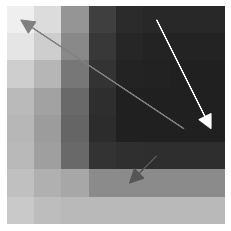

BRIEF Descriptor:
[0. 1. 1.]


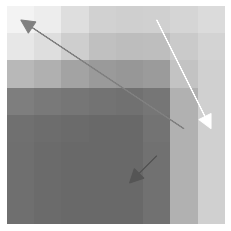

BRIEF Descriptor:
[0. 1. 0.]


(0, [])

In [11]:
# create BRIEF descriptors for Hamming distance calculation
r1, r2 = BRIEFinteract(3,False)
# compute Hamming distance
computeHamming(r1, r2)